Rows: 638454 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): Agency Code, Agency Name, Agency Type, City, State, Month, Crime T...
dbl  (7): Record ID, Year, Incident, Victim Age, Perpetrator Age, Victim Cou...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,⋯,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,⋯,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,⋯,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,⋯,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,⋯,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,⋯,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,⋯,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,⋯,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI


   Record ID      Agency Code        Agency Name        Agency Type       
 Min.   :     1   Length:638454      Length:638454      Length:638454     
 1st Qu.:159614   Class :character   Class :character   Class :character  
 Median :319228   Mode  :character   Mode  :character   Mode  :character  
 Mean   :319228                                                           
 3rd Qu.:478841                                                           
 Max.   :638454                                                           
                                                                          
     City              State                Year         Month          
 Length:638454      Length:638454      Min.   :1980   Length:638454     
 Class :character   Class :character   1st Qu.:1987   Class :character  
 Mode  :character   Mode  :character   Median :1995   Mode  :character  
                                       Mean   :1996                     
                                   

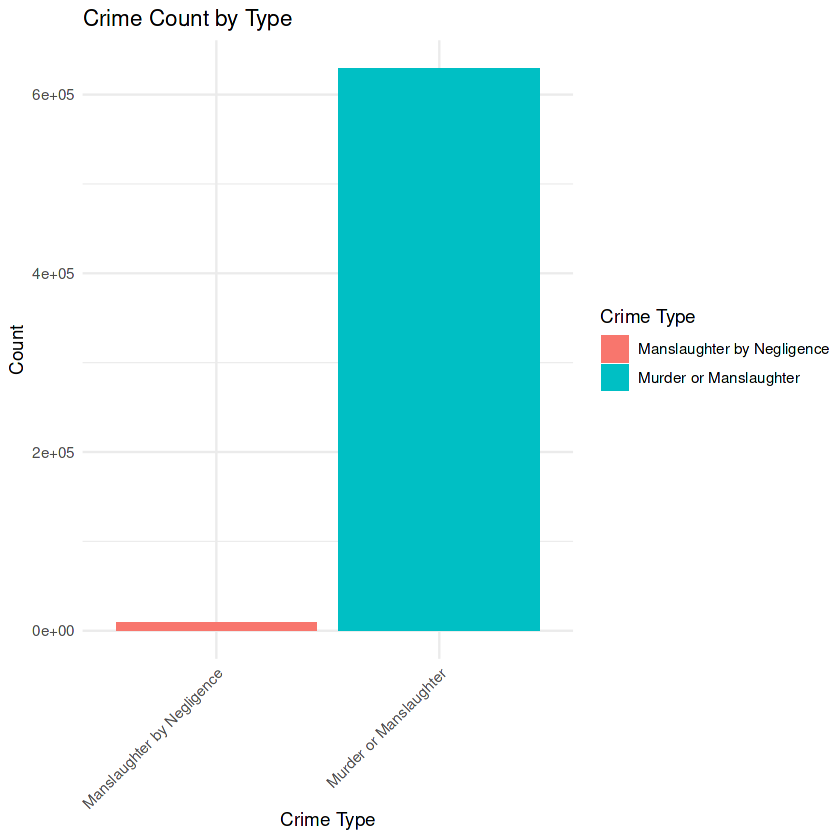

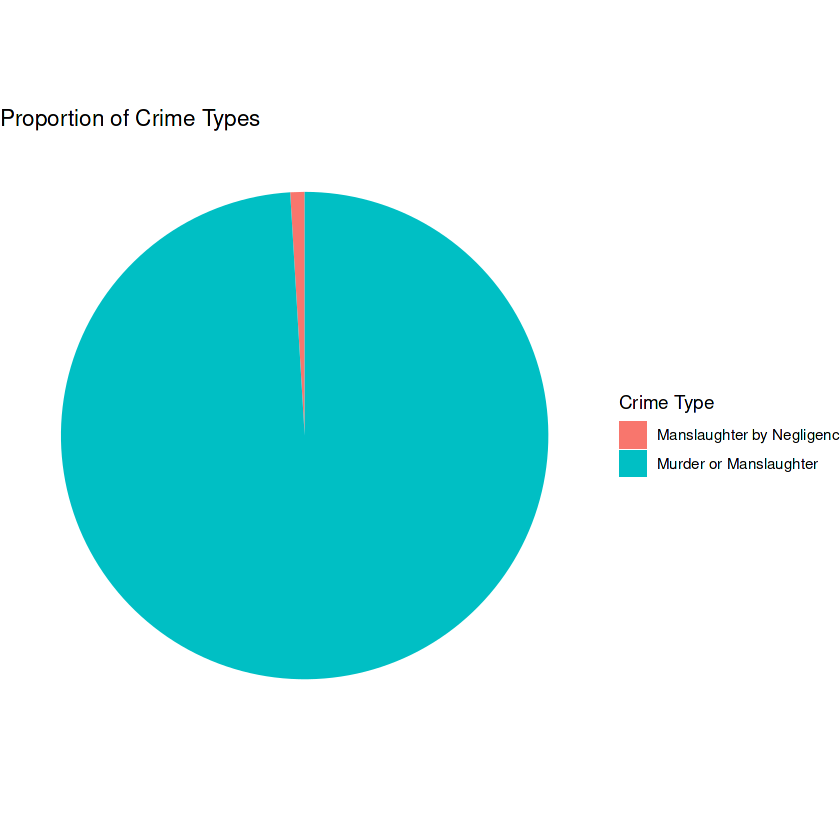

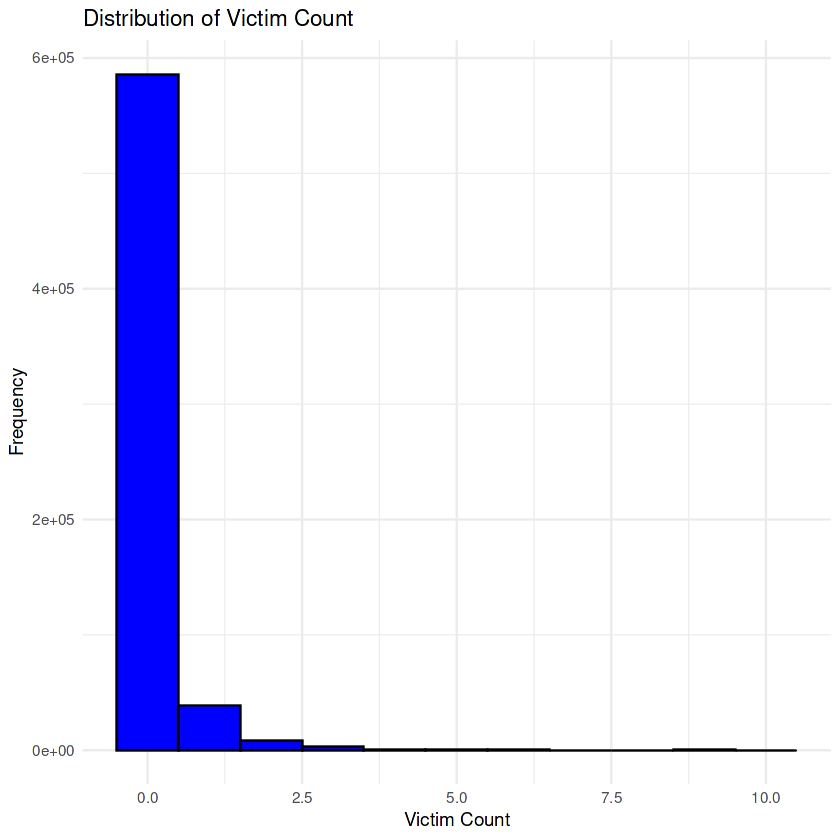

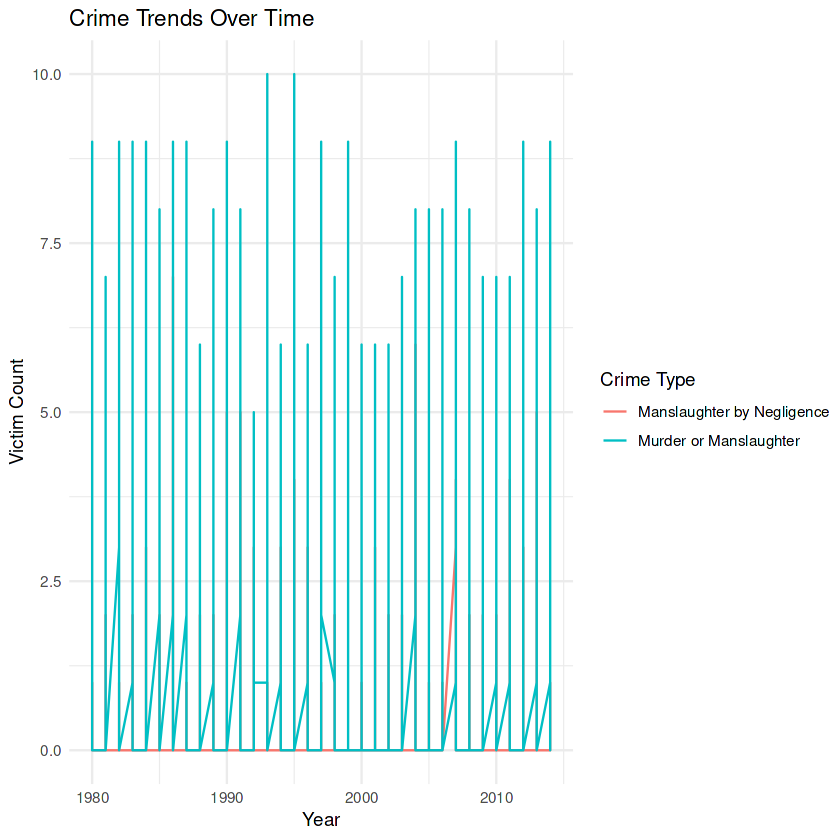

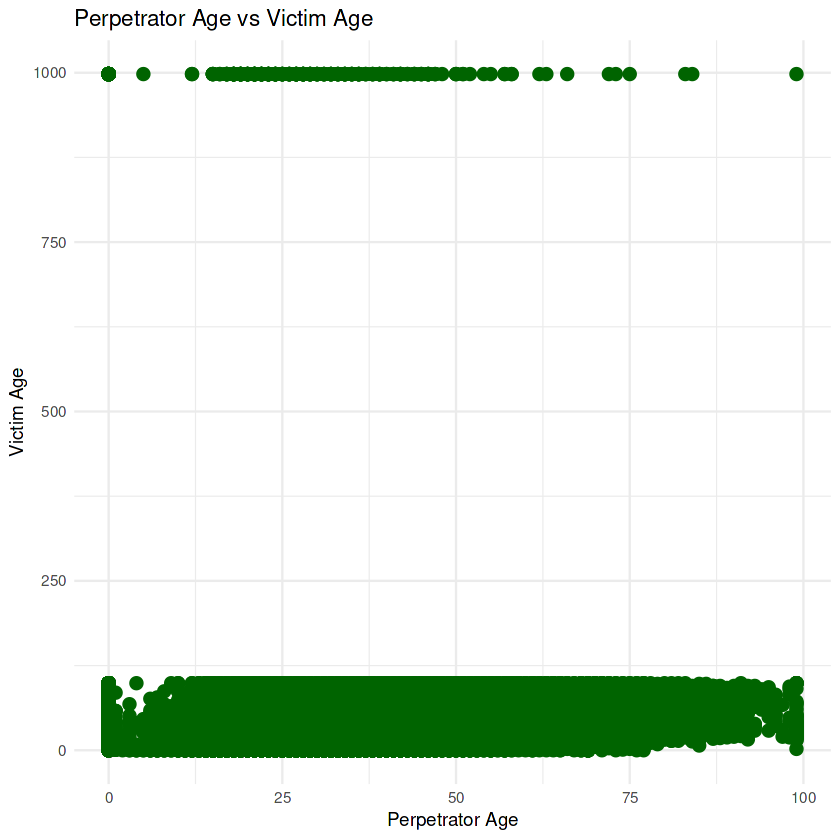

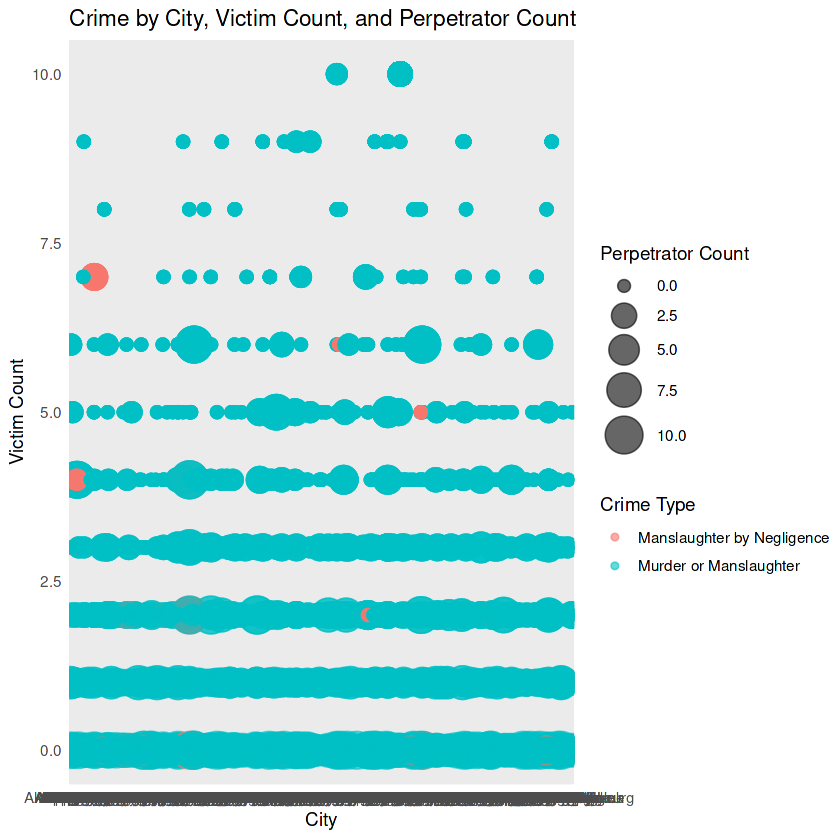

In [14]:
# Load necessary libraries
library(ggplot2)  # For plotting
library(dplyr)    # For data manipulation
library(readr)    # For reading the CSV file
library(tidyr)    # For handling missing data

# Load the dataset
crime_data <- read_csv('/kaggle/input/arnav-crime-adv/US_Crime_DataSet.csv')

# Inspect the dataset
head(crime_data)
summary(crime_data)

# Data cleaning: Remove rows with missing values
crime_data <- crime_data %>% drop_na()

# 1. Bar Chart: Crime count by Crime Type
ggplot(crime_data, aes(x = factor(`Crime Type`), fill = `Crime Type`)) +
  geom_bar() +
  labs(title = "Crime Count by Type", x = "Crime Type", y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 2. Pie Chart: Proportion of Crime Types
crime_summary <- crime_data %>%
  group_by(`Crime Type`) %>%
  summarize(Total_Crimes = sum(`Victim Count`))

ggplot(crime_summary, aes(x = "", y = Total_Crimes, fill = `Crime Type`)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  labs(title = "Proportion of Crime Types") +
  theme_void()

# 3. Histogram: Distribution of Victim Count
ggplot(crime_data, aes(x = `Victim Count`)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  labs(title = "Distribution of Victim Count", x = "Victim Count", y = "Frequency") +
  theme_minimal()

# 4. Time Line Chart: Crime Trends Over Time
ggplot(crime_data, aes(x = Year, y = `Victim Count`, color = `Crime Type`)) +
  geom_line() +
  labs(title = "Crime Trends Over Time", x = "Year", y = "Victim Count") +
  theme_minimal()

# 5. Scatter Plot: Perpetrator Age vs Victim Age
ggplot(crime_data, aes(x = `Perpetrator Age`, y = `Victim Age`)) +
  geom_point(color = "darkgreen", size = 3) +
  labs(title = "Perpetrator Age vs Victim Age", x = "Perpetrator Age", y = "Victim Age") +
  theme_minimal()

# 6. Bubble Plot: Crime by Location, Victim Count, and Perpetrator Count
ggplot(crime_data, aes(x = `City`, y = `Victim Count`, size = `Perpetrator Count`, color = `Crime Type`)) +
  geom_point(alpha = 0.6) +
  scale_size(range = c(3, 10)) +
  labs(title = "Crime by City, Victim Count, and Perpetrator Count", x = "City", y = "Victim Count") +
  theme_minimal()
